In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Loading the data at a glance:

In [2]:
password_dataset = pd.read_csv(r"C:\Users\user\Desktop\data\password strenght\archive\passwords.csv", index_col='rank')

Data exploration

In [3]:
password_dataset.head()

,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
rank,,,,,,,,
1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0
2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0
3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0
4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0
5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0


In [4]:
password_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 507 entries, 1.0 to nan
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   password           500 non-null    object 
 1   category           500 non-null    object 
 2   value              500 non-null    float64
 3   time_unit          500 non-null    object 
 4   offline_crack_sec  500 non-null    float64
 5   rank_alt           500 non-null    float64
 6   strength           500 non-null    float64
 7   font_size          500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 35.6+ KB


In [5]:
password_dataset.shape

(507, 8)

Cleaning data and handling inconsistencies:

In [6]:
password_dataset.isnull().sum()

password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [7]:
#Remove rows with missing values

password_dataset.dropna(axis=0, how='any', inplace=True)

In [8]:
#Check for duplicate data

password_dataset.duplicated().sum()

0

Password strengths analysis and visualizations:

In [9]:
#Generate descriptive statistics for the 'strength' column

strength_stats = password_dataset['strength'].describe()
print(strength_stats)

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: strength, dtype: float64


In [10]:
# filter weak passwords whose strenght is less than 10 and count them

weak_password = password_dataset[password_dataset['strength'] < 10]
weak_password_counts = len(weak_password)
print(f"Number of Weak passwords: {weak_password_counts}")

Number of Weak passwords: 475


In [11]:
# filter strong passwords whose strength is more than 10 and count them
strong_password = password_dataset[password_dataset['strength'] > 20]
strong_password_counts = len(strong_password)
print(f"Number of strong passwords: {strong_password_counts}")

# Display some of these passwords
common_strong_passwords = strong_password['password']

print('............')
print('Sample of reliable passwords:')
print(common_strong_passwords.head())

Number of strong passwords: 14
............
Sample of reliable passwords:
rank
13.0       abc123
26.0     trustno1
149.0     ncc1701
197.0     thx1138
321.0     bond007
Name: password, dtype: object


In [12]:
# filter the password with the weakest strength (strength == 0)
weakest_password = password_dataset[password_dataset['strength'] == 0]

# Display some common weakest passwords
common_weakest_password = weakest_password['password']
print('Sample of common weakest_password')
print(common_weakest_password.head())

# Count all weakest passwords
print('......................')
print("Number of all password with zero strength:")
print(len(weakest_password))

Sample of common weakest_password
rank
19.0    111111
20.0      2000
46.0    pepper
60.0    666666
77.0      1111
Name: password, dtype: object
......................
Number of all password with zero strength:
30


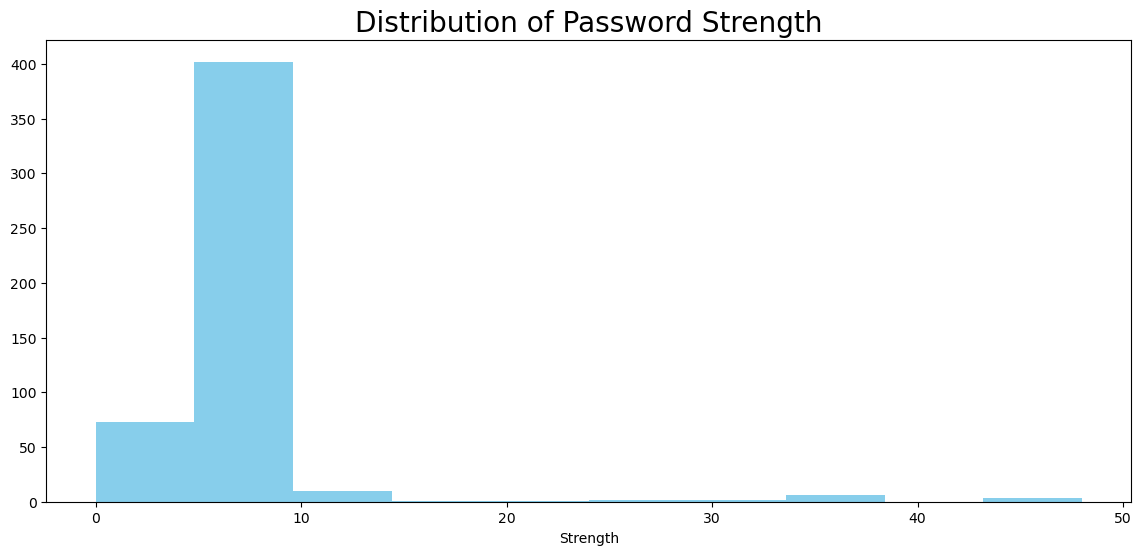

In [13]:
#show a distribution of password strength

plt.figure(figsize=(14,6))
plt.hist(password_dataset['strength'], color='skyblue')
plt.style.use('fivethirtyeight')
plt.title('Distribution of Password Strength')
plt.xlabel('Strength')
plt.show()


# This is a histogram to depict the spread of passwords' strength.
# it's observable that most of the passwords in this dataset are not strong enough.
# because they most strength cluster around 5-10

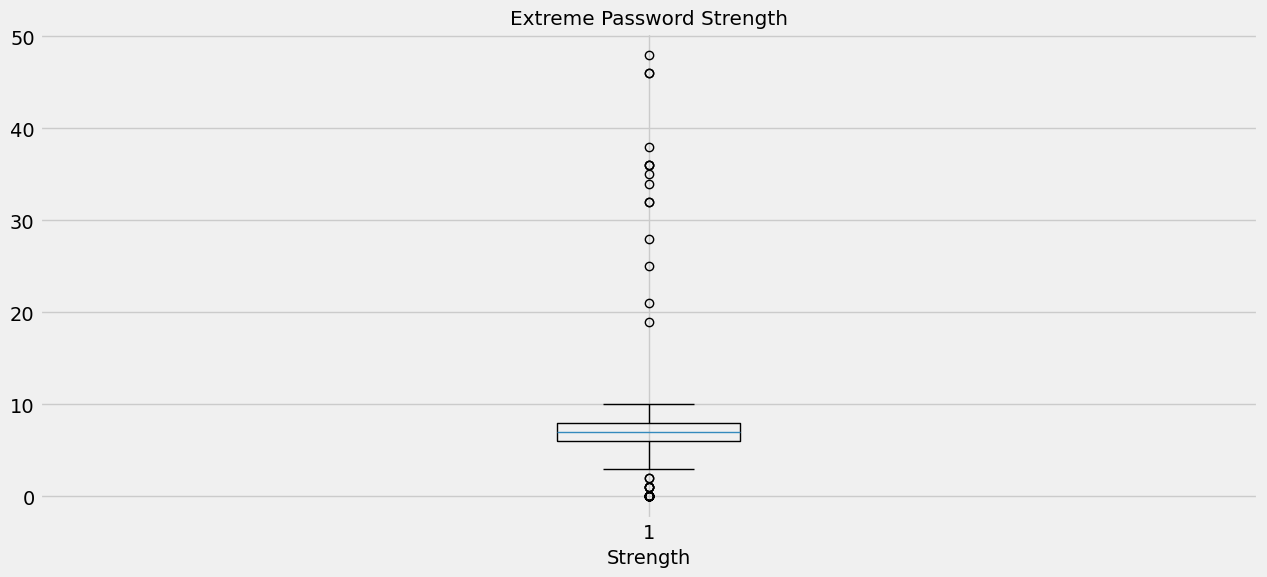

In [14]:
# Detect outliers in the strength of passwords

plt.figure(figsize=(14,6))
plt.boxplot(password_dataset['strength'])
plt.style.use('ggplot')
plt.title('Extreme Password Strength')
plt.xlabel('Strength')
plt.show()


# This is a boxplot to spot outliers in the passwords' strength.
# the graph shows that some passwords lie beyond the whiskers.
# because their strength are either too high or too low.
# Therefore, they are considered potential outliers.

# Category column

perfoming analytical operations on the category column

In [15]:
# Get unique category in the 'category' column
unique_categories = password_dataset['category'].unique()
print('Unique Categories:')
print('\n',unique_categories)

Unique Categories:

 ['password-related' 'simple-alphanumeric' 'animal' 'sport' 'cool-macho'
 'name' 'fluffy' 'food' 'nerdy-pop' 'rebellious-rude']


In [16]:
#Exemplifying a filter with the 'fluffy' category
cat_fluffy = password_dataset['category'] == 'fluffy'
fluffy_passwords = password_dataset[cat_fluffy]

print('passwords in the fluffy category:\n')
print(fluffy_passwords.head())

passwords in the fluffy category:

      password category  value time_unit  offline_crack_sec  rank_alt  \
rank                                                                    
42.0      love   fluffy   7.92   minutes           0.000005      42.0   
43.0  sunshine   fluffy   6.91     years           2.170000      43.0   
54.0    silver   fluffy   3.72      days           0.003210      54.0   
63.0    orange   fluffy   3.72      days           0.003210      63.0   
70.0    ginger   fluffy   3.72      days           0.003210      70.0   

      strength  font_size  
rank                       
42.0       6.0       10.0  
43.0       9.0       12.0  
54.0       8.0       11.0  
63.0       8.0       11.0  
70.0       7.0       11.0  


In [17]:
#Checking passwords based on 2 categories: 'category' and 'strength'
cat_and_str = (password_dataset['category'] == 'cool-macho') & (password_dataset['strength'] < 10)
weak_cool_macho = password_dataset.loc[cat_and_str]

print("Weak Passwords with 'cool-macho' category:")
print(pd.DataFrame(weak_cool_macho))

Weak Passwords with 'cool-macho' category:
      password    category  value time_unit  offline_crack_sec  rank_alt  \
rank                                                                       
14.0   mustang  cool-macho   3.19    months            0.08350      14.0   
16.0    shadow  cool-macho   3.72      days            0.00321      16.0   
17.0    master  cool-macho   3.72      days            0.00321      17.0   
23.0    harley  cool-macho   3.72      days            0.00321      23.0   
25.0    hunter  cool-macho   3.72      days            0.00321      25.0   
...        ...         ...    ...       ...                ...       ...   
474.0  playboy  cool-macho   3.19    months            0.08350     476.0   
476.0  pumpkin  cool-macho   3.19    months            0.08350     478.0   
492.0   sniper  cool-macho   3.72      days            0.00321     494.0   
495.0   hotrod  cool-macho   3.72      days            0.00321     497.0   
496.0   reddog  cool-macho   3.72      days  

In [18]:

#filter passwords with a strength more than 35 and get their category
strong_passwords = password_dataset[password_dataset['strength'] > 35]
strong_password_categories = strong_passwords['category']

print('Categories with strong passwords:\n')
print(strong_password_categories)


Categories with strong passwords:

rank
149.0              nerdy-pop
197.0              nerdy-pop
321.0              nerdy-pop
336.0              nerdy-pop
359.0              nerdy-pop
395.0    simple-alphanumeric
478.0    simple-alphanumeric
Name: category, dtype: object


In [19]:
#Count the category of 'strong passwords' with a strength over 35

from collections import Counter

strong_counter = Counter()

for item in strong_password_categories:
    strong_counter.update(strong_password_categories.tolist())
    
print('categories with the strong password:\n')
print(strong_counter)


categories with the strong password:

Counter({'nerdy-pop': 35, 'simple-alphanumeric': 14})


Visuals of Comparison

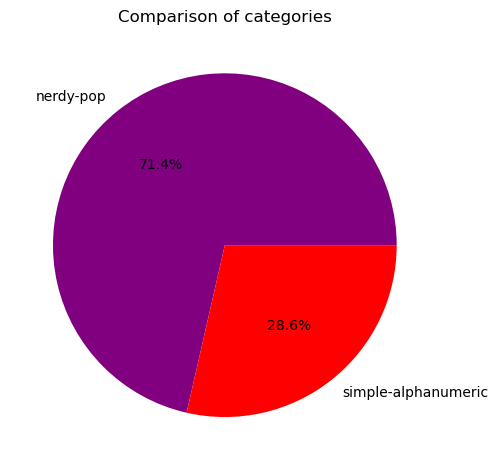

In [20]:
#Comparing 'nerdy-pop' and 'simple-alphanumeric' categories


category_names = [item[0] for item in strong_counter.items()]
category_values = [item[1] for item in strong_counter.items()]


plt.pie(category_values, labels=category_names, autopct='%1.1f%%', colors=['purple','red'])
plt.title('Comparison of categories', loc='center',fontsize=12)
plt.tight_layout()
plt.style.use('ggplot')
plt.grid(True)
plt.show()

In [21]:
#Filter and count the total 'weak passwords' under each category

weak_password = password_dataset[password_dataset['strength'] == 0]
weak_password_category = weak_password['category'].value_counts()


print('categories with weak passwords:\n')
print(weak_password_category)


categories with weak passwords:

simple-alphanumeric    25
food                    2
fluffy                  1
name                    1
cool-macho              1
Name: category, dtype: int64


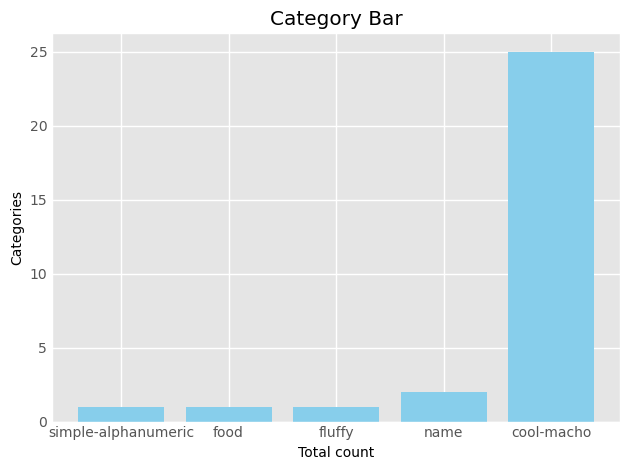

In [22]:
# Visualizing the distribution of 'weak password category'

#splitting the count result into x and y axes
x = [item[0] for item in weak_password_category.items()]
y = [item[1] for item in weak_password_category.items()]

#reverse to order of count to suit an horizontal bar
y.reverse()

plt.bar(x,y, color='skyblue')
plt.ylabel('Categories')
plt.xlabel('Total count')
plt.title('Category Bar')
plt.tight_layout()
plt.style.use('fivethirtyeight')

plt.show()

# The time range for password cracking

Exploring the 'value' and the 'time_unit' columns

In [23]:
#Get unique values in 'value' and 'time_unit' columns
#these are the lengths of time it takes to crack a password

unique_values = password_dataset['value'].unique

#print unique values
print('Unique values:\n')
print(unique_values)

Unique values:

<bound method Series.unique of rank
1.0       6.91
2.0      18.52
3.0       1.29
4.0      11.11
5.0       3.72
         ...  
496.0     3.72
497.0     6.91
498.0     3.19
499.0     3.72
500.0    92.27
Name: value, Length: 500, dtype: float64>


In [24]:
#Get unique time_unit
#this are the ranges of time it takes: (seconds,minutes,hours...)

unique_time_unit = password_dataset['time_unit'].unique()

print('Unique time-units:')
print(unique_time_unit)

Unique time-units:
['years' 'minutes' 'days' 'seconds' 'months' 'weeks' 'hours']


In [25]:
#find and print the minimum values for passwords that can get cracked in seconds

crack_in_seconds = password_dataset.loc[password_dataset['time_unit'] == 'seconds', 'value'].min()

print('some passwords that get cracked in the least time:')
print(crack_in_seconds)

#show the range of time of the cracking
time_range = password_dataset.loc[(password_dataset['value'] == crack_in_seconds), 'time_unit']

print('\nThe time range of the password:\n')
print(time_range.head())

#count how many of the passwords can get cracked in seconds
count_seconds = time_range.value_counts().sum()

print("\nThe total count of passwords:")
print(count_seconds)

some passwords that get cracked in the least time:
11.11

The time range of the password:

rank
4.0      seconds
20.0     seconds
45.0     seconds
77.0     seconds
277.0    seconds
Name: time_unit, dtype: object

The total count of passwords:
11


In [26]:
#Get the lengths of time for passwords that can get cracked over years

crack_in_years = password_dataset.loc[password_dataset['time_unit'] == 'years', 'value']

print('The lengths of time for password cracking\n')
print(crack_in_years.tail())

#Total counts of passwords that can get can cracked over the years
print('\nTotal counts:\n')
print(crack_in_years.value_counts().sum())

#show the ranges of time equivalent to the above passwords
range_of_time = password_dataset.loc[password_dataset['value'].isin(crack_in_years), 'time_unit']

print('\nThe range of time:\n')
print(range_of_time.head())

#count the lengths of time that exceed 10 years
over_10_years = crack_in_years[crack_in_years > 10]
print('\nOver 10 years:\n')
print(over_10_years)


The lengths of time for password cracking

rank
468.0     6.91
477.0     6.91
478.0     2.56
497.0     6.91
500.0    92.27
Name: value, dtype: float64

Total counts:

65

The range of time:

rank
1.0     years
8.0     years
9.0     years
18.0    years
22.0    years
Name: time_unit, dtype: object

Over 10 years:

rank
26.0     92.27
336.0    92.27
406.0    92.27
500.0    92.27
Name: value, dtype: float64


Comparing top 4 passwords with the same years of crack with their respective Categories and Strengths

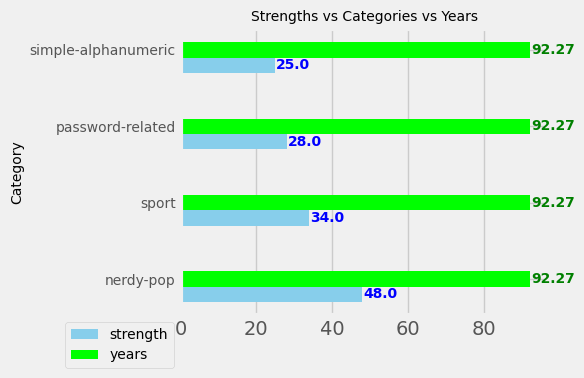

In [56]:
#find passwords that takes more than 60 years to crack
more_than_60 = password_dataset[password_dataset['value'] > 60]

#check the category of each password
password_category = more_than_60['category']

#check the strength of each password
password_strength = more_than_60['strength']

#check the range of time of each password
password_time = more_than_60['value']

#initialize the x_axis and the width
years = np.arange(len(more_than_60))
width = 0.20

#create figure and plot bars
plt.figure(figsize=(6,4))
plt.barh(years-width, password_strength, width, color='skyblue',label='strength')
plt.barh(years, password_time, width, color = 'lime', label='years')

#set labels and title
plt.yticks(ticks=years, labels=password_category, fontsize=10)
plt.title('Strengths vs Categories vs Years', fontsize=10, loc='center')
plt.ylabel('Category', fontsize=10)

#adjust and set style
plt.legend(loc='upper right', bbox_to_anchor=(0,0), fontsize=10)
plt.style.use('fast')

#Add descriptive labels to the bars
for index1, strength in enumerate(password_strength):
    plt.text(strength + 0.3, index1 - width, str(strength), color='blue', fontsize=10,va='center', fontweight='bold')
for index2, time in enumerate(password_time):
    plt.text(time + 0.3, index2, str(time), color='green',  va='center', fontsize=10,  fontweight='bold')

#render
plt.tight_layout()
plt.savefig('barh.png')
plt.show()



In [28]:
v

92.27

# Font Size Analysis

check the effect of font size on other columns

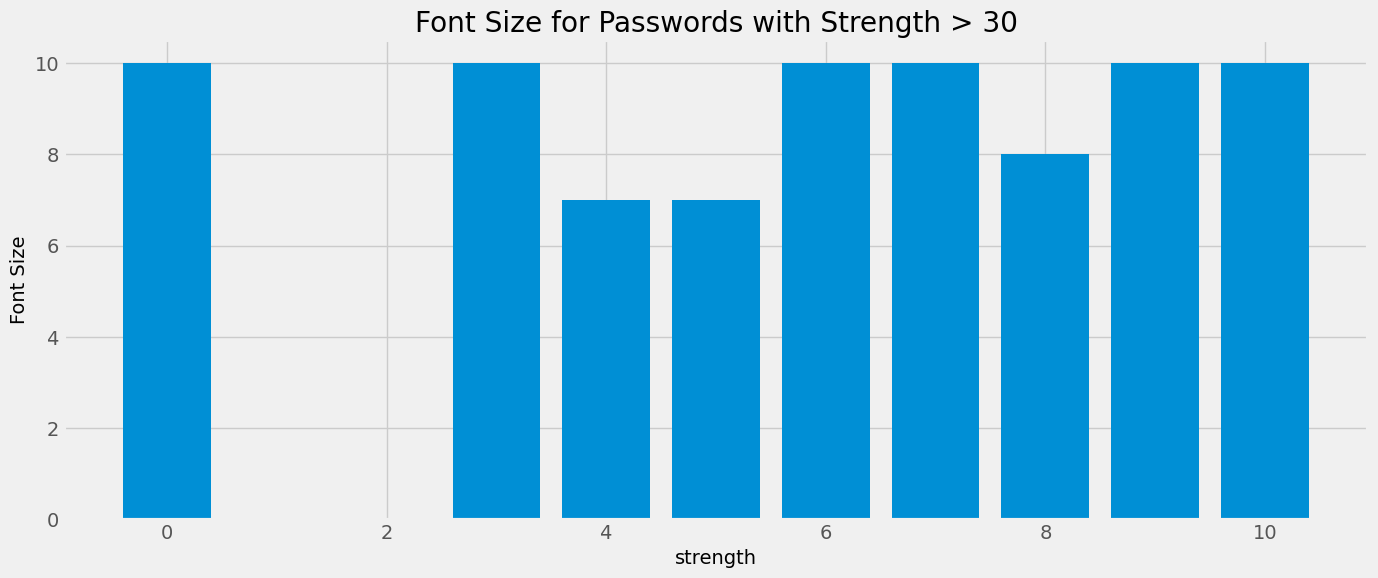

In [29]:
#filtering passwords with strength greater than 30
over_thirty = password_dataset.loc[password_dataset['strength'] > 30, 'strength']

#Get the font size of the passwords
font_of_over_thirty = password_dataset.loc[over_thirty, 'font_size']

#plot a bar chart for font size

x = np.arange(len(over_thirty))
y = font_of_over_thirty

plt.figure(figsize=(14,6))
plt.bar(x,y)
plt.title('Font Size for Passwords with Strength > 30')
plt.xlabel('strength')
plt.ylabel('Font Size')
plt.grid(True)
plt.style.use('fast')
plt.tight_layout()
plt.show()

In [30]:
a = password_dataset['strength'] > 30

In [31]:
password_dataset[password_dataset['strength'] > 30]

,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size
rank,,,,,,,,
13.0,abc123,simple-alphanumeric,3.70,weeks,0.022400,13.0,32.0,23.0
149.0,ncc1701,nerdy-pop,2.56,years,0.806000,149.0,46.0,27.0
197.0,thx1138,nerdy-pop,2.56,years,0.806000,198.0,46.0,27.0
321.0,bond007,nerdy-pop,2.56,years,0.806000,322.0,38.0,25.0
336.0,rush2112,nerdy-pop,92.27,years,29.020000,337.0,48.0,28.0
344.0,red123,simple-alphanumeric,3.70,weeks,0.022400,345.0,35.0,24.0
359.0,ou812,nerdy-pop,17.28,hours,0.000622,360.0,36.0,24.0
395.0,heka6w2,simple-alphanumeric,2.56,years,0.806000,396.0,36.0,24.0
406.0,jordan23,sport,92.27,years,29.270000,407.0,34.0,23.0


<Axes: xlabel='rank'>

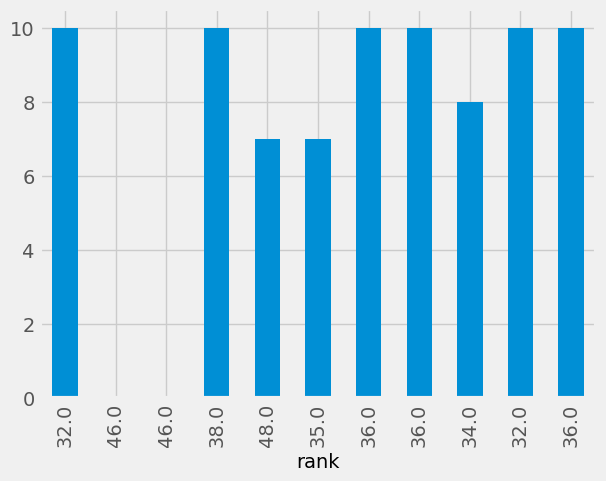

In [32]:
font_of_over_thirty.plot(kind='bar')

In [33]:
font_of_over_thirty

rank
32.0    10.0
46.0     0.0
46.0     0.0
38.0    10.0
48.0     7.0
35.0     7.0
36.0    10.0
36.0    10.0
34.0     8.0
32.0    10.0
36.0    10.0
Name: font_size, dtype: float64

In [34]:
over_thirty

rank
13.0     32.0
149.0    46.0
197.0    46.0
321.0    38.0
336.0    48.0
344.0    35.0
359.0    36.0
395.0    36.0
406.0    34.0
463.0    32.0
478.0    36.0
Name: strength, dtype: float64

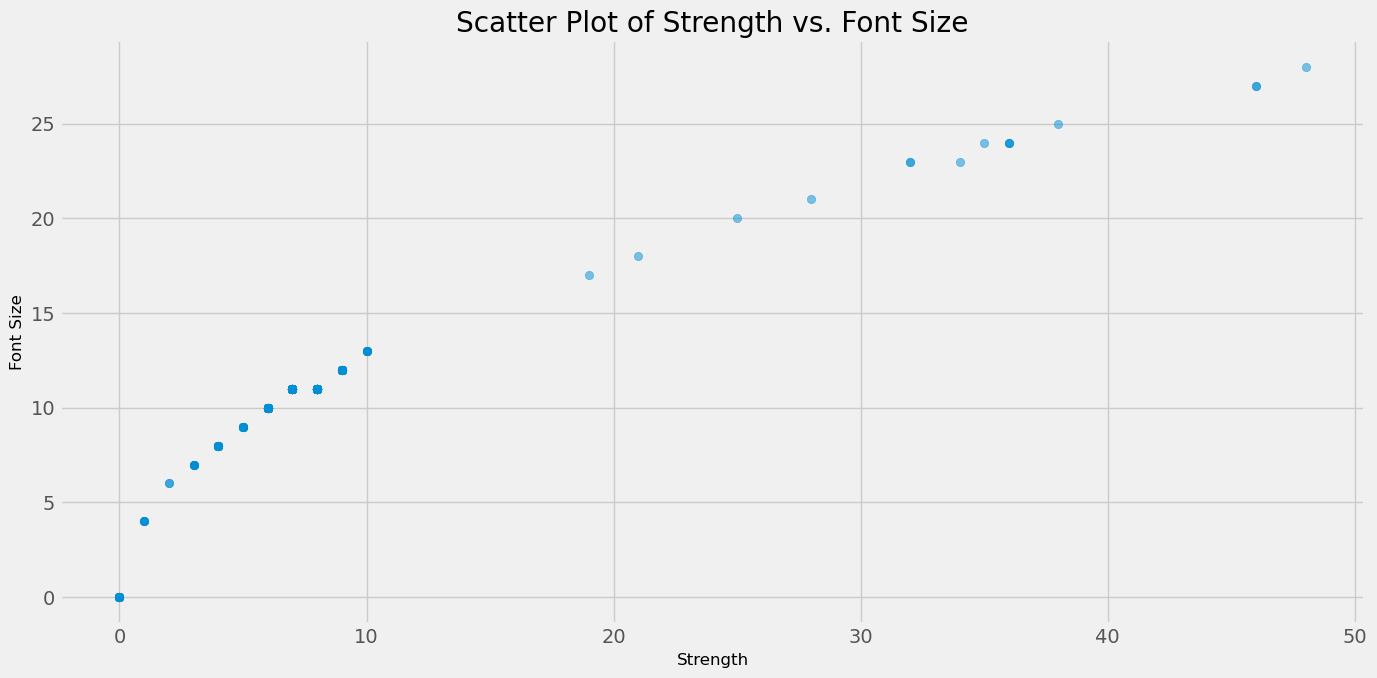

In [35]:
#Creat a scatter plot between 'strength' and 'font_size'

plt.figure(figsize=(14,7))
plt.scatter(password_dataset['strength'], password_dataset['font_size'], alpha=0.5,)
plt.title('Scatter Plot of Strength vs. Font Size')
plt.xlabel('Strength', fontsize=12)
plt.ylabel('Font Size', fontsize=12)
plt.style.use('fast')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
zero_strength = password_dataset.loc[password_dataset['strength'] == 0, 'font_size']

In [37]:
password_dataset['re_ranked'] = password_dataset['strength'].rank(method='first', ascending=False).astype(int)

In [38]:
password_dataset = password_dataset.sort_values(by='re_ranked', ascending=True)
password_dataset = password_dataset.reset_index(drop=True)

In [39]:
password_dataset

,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,re_ranked
0,rush2112,nerdy-pop,92.27,years,29.020000,337.0,48.0,28.0,1
1,ncc1701,nerdy-pop,2.56,years,0.806000,149.0,46.0,27.0,2
2,thx1138,nerdy-pop,2.56,years,0.806000,198.0,46.0,27.0,3
3,bond007,nerdy-pop,2.56,years,0.806000,322.0,38.0,25.0,4
4,ou812,nerdy-pop,17.28,hours,0.000622,360.0,36.0,24.0,5
...,...,...,...,...,...,...,...,...,...
495,11111,simple-alphanumeric,1.85,minutes,0.000001,411.0,0.0,0.0,496
496,999999,simple-alphanumeric,18.52,minutes,0.000011,422.0,0.0,0.0,497
497,333333,simple-alphanumeric,18.52,minutes,0.000011,461.0,0.0,0.0,498
498,xxxx,simple-alphanumeric,7.92,minutes,0.000005,475.0,0.0,0.0,499


In [40]:
#Drop the rank_alt column

password_dataset.drop(columns='rank_alt', inplace=True)

In [41]:
password_dataset

,password,category,value,time_unit,offline_crack_sec,strength,font_size,re_ranked
0,rush2112,nerdy-pop,92.27,years,29.020000,48.0,28.0,1
1,ncc1701,nerdy-pop,2.56,years,0.806000,46.0,27.0,2
2,thx1138,nerdy-pop,2.56,years,0.806000,46.0,27.0,3
3,bond007,nerdy-pop,2.56,years,0.806000,38.0,25.0,4
4,ou812,nerdy-pop,17.28,hours,0.000622,36.0,24.0,5
...,...,...,...,...,...,...,...,...
495,11111,simple-alphanumeric,1.85,minutes,0.000001,0.0,0.0,496
496,999999,simple-alphanumeric,18.52,minutes,0.000011,0.0,0.0,497
497,333333,simple-alphanumeric,18.52,minutes,0.000011,0.0,0.0,498
498,xxxx,simple-alphanumeric,7.92,minutes,0.000005,0.0,0.0,499


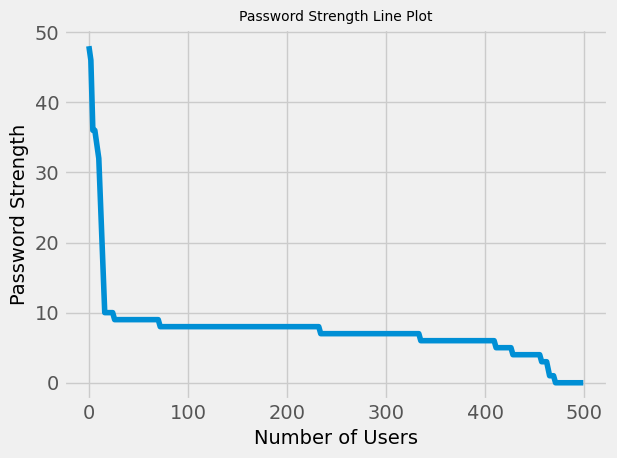

In [42]:
x = np.arange(len(password_dataset['strength']))
y = password_dataset['strength']

plt.plot(x,y )
plt.title('Password Strength Line Plot', fontsize=10)
plt.xlabel('Number of Users')
plt.ylabel('Password Strength')
plt.tight_layout()
plt.style.use('fast')
plt.grid(True)